#📌 1. Extracción (E - Extract)

##Extracción de datos

Cargar los datos directamente desde la API utilizando Python.

In [141]:
import requests
import pandas as pd

In [142]:
#url = 'TelecomX_Data.json'

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [143]:
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [144]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 2. Transformación (T - Transform)

##Conoce el conjunto de datos

Verificamos incoherencias

Explorar las columnas del dataset y verificar sus tipos de datos.

In [145]:
#Observamos que no hay valores nulos.
#En "account.Charges.Total" -> si son numéricos deben de ser tipo entero o float, al observar la tabla vemos que son valores de tipo float. Tenemos que convertir estos valores a float.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [146]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


Efectuar un diccionario para comprender mejor el significado de las variables

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

organizamos en un formato jerárquico, conteniendo la siguiente información:

1. **Identificación del Cliente**
* `'customerID'`: número de identificación único de cada cliente.


2. **Cancelación del servicio**
* `'Churn'`: si el cliente dejó o no la empresa. (`Yes` o `No`).


3. **Información del Cliente** (`'customer'`)
* `'gender'`: género (masculino y femenino). (`Male` o `Female`).
* `'SeniorCitizen'`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años. (0 = No, 1 = Sí).
* `'Partner'`: si el cliente tiene o no una pareja. (`Yes` o `No`).
* `'Dependents'`: si el cliente tiene o no dependientes. (`Yes` o `No`).
* `'tenure'`: meses de contrato del cliente. (en meses).


4. **Servicios de Telefonía** (`'phone'`)
* `'PhoneService'`: suscripción al servicio telefónico. (`Yes` o `No`).
* `'MultipleLines'`: suscripción a más de una línea telefónica. (`Yes` o `No` o `No phone service`).


5. **Servicios de Internet** (`'internet'`)
* `'InternetService'`: suscripción a un proveedor de internet. (`DSL`, `Fiber optic`, `No`).
* Servicios adicionales. (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).


6. **Información de la Cuenta** (`'account'`)
* `'Contract'`: tipo de contrato. (`Month-to-month`, `One year`, `Two year`).
* `'PaperlessBilling'`: si el cliente prefiere recibir la factura en línea. (`Yes` o `No`).
* `'PaymentMethod'`: forma de pago. (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).
* `'Charges.Monthly'`: total de todos los servicios del cliente por mes.
* `'Charges.Total'`: total gastado por el cliente.

##Comprobación de incoherencias en los datos

Verificar si hay problemas en los datos que puedan afectar el análisis. Hay que prestar atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurar que los datos estén listos para las siguientes etapas.

Valores nulos

In [147]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Valores vacíos o en blanco

In [148]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


Observamos en dónde se ubican los valores vacíos en la columna Churn

In [149]:
df[df['Churn'] == ""]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


Observamos en dónde se ubican los valores vacíos o en blanco en account.Charges.Total.

In [150]:
#account.Charges.Total ≈ account.Charges.Monthly * customer.tenure.
#Es posible que estén vacíos porque el campo tenure es 0 (por ser cliente nuevo).
#El resultado del cálculo es aproximado, se podría asumir que hay otras variaciones que no se han incluido en la data.
#Encontraremos valores problemáticos: vacíos (''), NaN, Valores mal formateados, no numérico o que hagan falta.

faltantes = df.loc[
    ~df['account.Charges.Total']
        .astype(str)
        .str.replace('.', '', 1)
        .str.isnumeric()
]

faltantes

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Valores duplicados

In [151]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0


Valores únicos

In [152]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

customerID: 7267
Churn: 3
customer.gender: 2
customer.SeniorCitizen: 2
customer.Partner: 2
customer.Dependents: 2
customer.tenure: 73
phone.PhoneService: 2
phone.MultipleLines: 3
internet.InternetService: 3
internet.OnlineSecurity: 3
internet.OnlineBackup: 3
internet.DeviceProtection: 3
internet.TechSupport: 3
internet.StreamingTV: 3
internet.StreamingMovies: 3
account.Contract: 3
account.PaperlessBilling: 2
account.PaymentMethod: 4
account.Charges.Monthly: 1585
account.Charges.Total: 6531


In [153]:
#Observamos valores vacíos en la columna Churn.

for col in df.columns:
  print(f" Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7267'
 Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
 Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.tenure: 73'
 Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'internet.InternetService: 3'
['DSL' 'Fiber o

##Manejo de inconsistencias

Al identificar las inconsistencias, aplicamos las correcciones necesarias. Ajustamos los datos para asegurarnos de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

Cambiando account.Charges.Total para float

In [154]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


Verificamos

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [156]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


En account.Charges.Total -> Los valores vacios pasan a ser NaN

In [157]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [158]:
df[df['account.Charges.Total'].isna()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Eliminación de valores vacios en la columna Churn

In [159]:
#7267-224=7043

df = df[df['Churn'].str.strip() != '']
print("Número de filas despues de eliminar los vacios en 'Churn':", len(df))

Número de filas despues de eliminar los vacios en 'Churn': 7043


Verificamos

In [160]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [161]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [162]:
#7267-224=7043

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

Eliminación de valores NaN en account.Charges.Total

In [163]:
df = df.dropna(subset=['account.Charges.Total'])

Veificamos

In [164]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Verificamos como se ha actualizado la información

In [165]:
#7043-11=7032.
#224 "valores vacíos" + 11 "valores nulos" + 7032 "filas sin incoherencias" = 7267.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

Verificamos como se ha actualizado los valores únicos

In [166]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

customerID: 7032
Churn: 2
customer.gender: 2
customer.SeniorCitizen: 2
customer.Partner: 2
customer.Dependents: 2
customer.tenure: 72
phone.PhoneService: 2
phone.MultipleLines: 3
internet.InternetService: 3
internet.OnlineSecurity: 3
internet.OnlineBackup: 3
internet.DeviceProtection: 3
internet.TechSupport: 3
internet.StreamingTV: 3
internet.StreamingMovies: 3
account.Contract: 3
account.PaperlessBilling: 2
account.PaymentMethod: 4
account.Charges.Monthly: 1584
account.Charges.Total: 6530


In [167]:
#Observamos que ya no aparecen valores vacíos en la columna Churn.

for col in df.columns:
  print(f" Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7032'
 Valores unicos en la columna'Churn: 2'
['No' 'Yes']
--------------------------------------------------
 Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.tenure: 72'
 Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'internet.InternetService: 3'
['DSL' 'Fiber opti

##Columna de cuentas diarias

Crea la columna "cuentas_diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo

In [168]:
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


##Estandarización y transformación de datos

Traduce o renombra columnas y datos para que la información sea más accesible y fácil de entender , puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones.

La estandarización y transformación de datos es altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

In [169]:
#Diccionario con los nuevos nombres de las columnas.

columnas = {
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensual',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= columnas)
df



,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [170]:
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'No': '0', 'Fiber optic': 'Fibra óptica'})
df['seguridad_online'] = df['seguridad_online'].replace({'No internet service': 'Sin servicio de internet'})
df['backup_online'] = df['backup_online'].replace({'No internet service': 'Sin servicio de internet'})
df['proteccion_dispositivo'] = df['proteccion_dispositivo'].replace({'No internet service': 'Sin servicio de internet'})
df['soporte_tecnico'] = df['soporte_tecnico'].replace({'No internet service': 'Sin servicio de internet'})
df['streaming_tv'] = df['streaming_tv'].replace({'No internet service': 'Sin servicio de internet'})
df['streaming_peliculas'] = df['streaming_peliculas'].replace({'No internet service': 'Sin servicio de internet'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fibra óptica,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fibra óptica,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fibra óptica,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,Anual,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Masculino,0,Yes,No,22,Yes,Yes,Fibra óptica,...,No,No,No,Yes,Mensual,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Mensual,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Bienal,No,Mailed check,67.85,4627.65,2.261667


In [171]:
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Mensual,No,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fibra óptica,...,Yes,No,No,No,Mensual,Yes,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fibra óptica,...,Yes,No,Yes,Yes,Mensual,Yes,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fibra óptica,...,No,Yes,Yes,No,Mensual,Yes,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,Anual,No,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Masculino,0,Yes,No,22,Yes,Yes,Fibra óptica,...,No,No,No,Yes,Mensual,Yes,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Mensual,Yes,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Bienal,No,Cheque enviado por correo,67.85,4627.65,2.261667


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   Churn                   7032 non-null   object 
 2   genero                  7032 non-null   object 
 3   tiene +60               7032 non-null   int64  
 4   posee_pareja            7032 non-null   object 
 5   posee_dependientes      7032 non-null   object 
 6   tiempo_contrato         7032 non-null   int64  
 7   servicio_telefono       7032 non-null   object 
 8   multiples_lineas        7032 non-null   object 
 9   tipo_internet           7032 non-null   object 
 10  seguridad_online        7032 non-null   object 
 11  backup_online           7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  streaming_tv            7032 non-null   objec

#📊 3. Carga y análisis (L - Load & Analysis)

##Análisis Descriptivo

Realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [173]:
#media -> mean.
#mediana -> 50%.
#desviación estándar -> std.

# Análisis descriptivo básico
df.describe()

,tiene +60,tiempo_contrato,valor_mensual,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [174]:
#Estadística descriptiva de las variables categóricas

df.describe(include='O')

,id,Churn,genero,posee_pareja,posee_dependientes,servicio_telefono,multiples_lineas,tipo_internet,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Masculino,No,No,Yes,No,Fibra óptica,No,No,No,No,No,No,Mensual,Yes,Cheque electrónico
freq,1,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [175]:
#Estadística descriptiva de las variables numéricas

df.describe(include=['number'])

,tiene +60,tiempo_contrato,valor_mensual,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [176]:
df.describe(include='object')

,id,Churn,genero,posee_pareja,posee_dependientes,servicio_telefono,multiples_lineas,tipo_internet,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Masculino,No,No,Yes,No,Fibra óptica,No,No,No,No,No,No,Mensual,Yes,Cheque electrónico
freq,1,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [177]:
df.describe(include='int64')

,tiene +60,tiempo_contrato
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [178]:
df.describe(include='float64')

,valor_mensual,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,2.159940
std,30.085974,2266.771362,1.002866
min,18.250000,18.800000,0.608333
25%,35.587500,401.450000,1.186250
50%,70.350000,1397.475000,2.345000
75%,89.862500,3794.737500,2.995417
max,118.750000,8684.800000,3.958333


In [179]:
#Combinado

df.describe(include='all')

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
count,7032,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032.000000
unique,7032,2,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,9995-HOTOH,No,Masculino,NaN,No,No,NaN,Yes,No,Fibra óptica,...,No,No,No,No,Mensual,Yes,Cheque electrónico,NaN,NaN,NaN
freq,1,5163,3549,NaN,3639,4933,NaN,6352,3385,3096,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,2.159940
std,NaN,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,1.002866
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.608333
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,1.186250
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,2.345000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,2.995417


##Distribución de evasión

El objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [180]:
import matplotlib.pyplot as plt

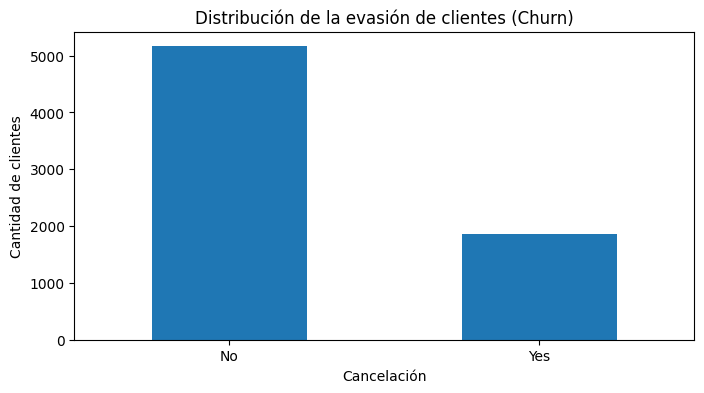

In [181]:
plt.figure(figsize=(8, 4))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribución de la evasión de clientes (Churn)')
plt.xlabel('Cancelación')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()

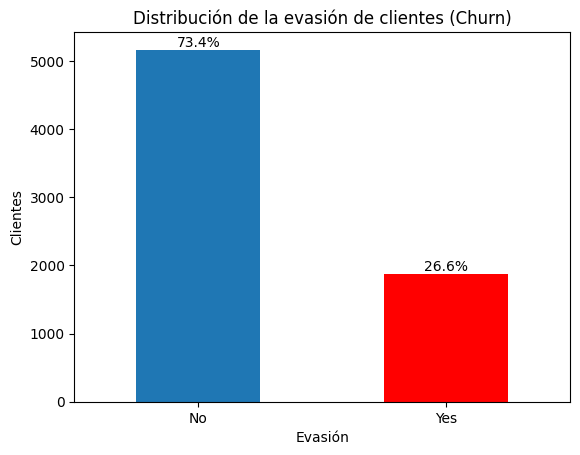

In [182]:
#Conteo de evasión
evasion_counts = df['Churn'].value_counts()

#Calcular porcentajes
evasion_porcentaje = (evasion_counts / evasion_counts.sum()) * 100

#Crear gráfica de barras
ax = evasion_counts.plot(kind='bar', color=['#1f77b4', 'red'], title='Distribución de la evasión de clientes (Churn)')

#Adicionar los porcentajes dentro de las barras
for i, v in enumerate(evasion_counts):
    ax.text(i, v + 2, f'{evasion_porcentaje.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=10)

#Mostrar el gráfico
plt.xlabel('Evasión')
plt.ylabel('Clientes')
plt.xticks(rotation=0)  #Para mantener las etiquetas legibles
plt.show()

Observaciones

-Hay una evasión general de clientes del 26.6%

-Cuando observamos una tasa del 25% o más en cancelaciones, la empresa debería tomar medidas para generar soluciones a este problema.

##Recuento de evasión por variables categóricas

Exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Tasas de abandono por varibles categóricas

In [183]:
import plotly.express as px

In [184]:
px.histogram(df, x = 'genero', text_auto = True, color = 'Churn', barmode = 'group')

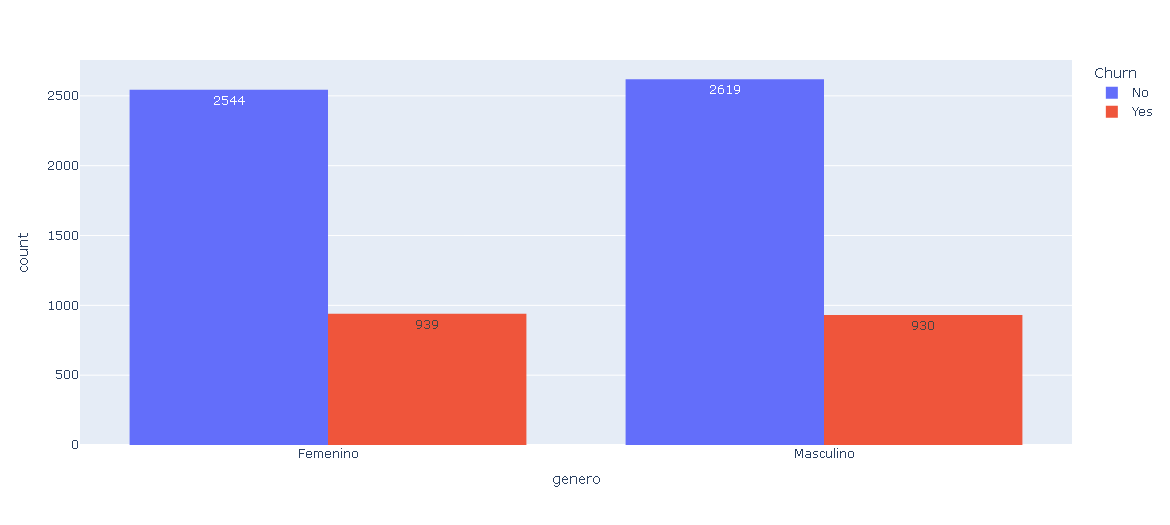

In [185]:
px.histogram(df, x = 'tiene +60', text_auto = True, color = 'Churn', barmode = 'group')

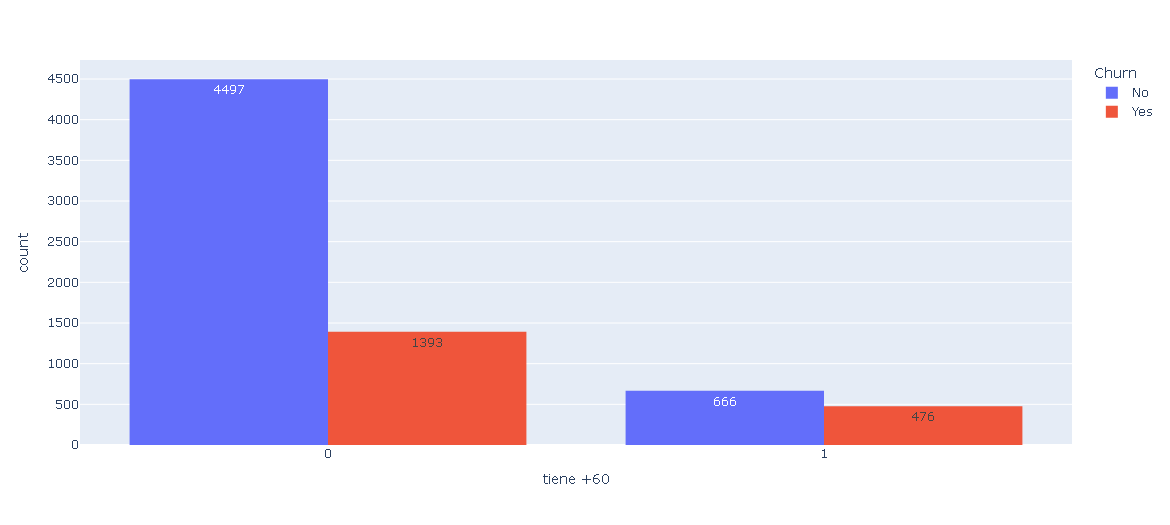

In [186]:
color = {
    'No': '#1f77b4',
    'Yes': 'red'
}

px.histogram(df, x = 'posee_pareja', text_auto = True, color = 'Churn', color_discrete_map=color, barmode = 'group')

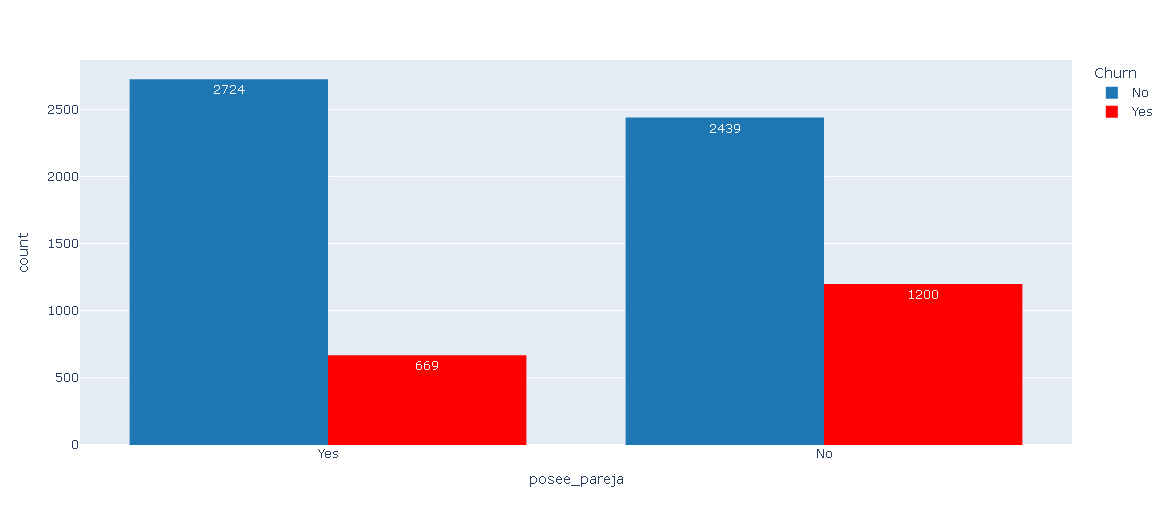

In [187]:
px.histogram(df, x = 'posee_dependientes', text_auto = True, color = 'Churn', barmode = 'group')

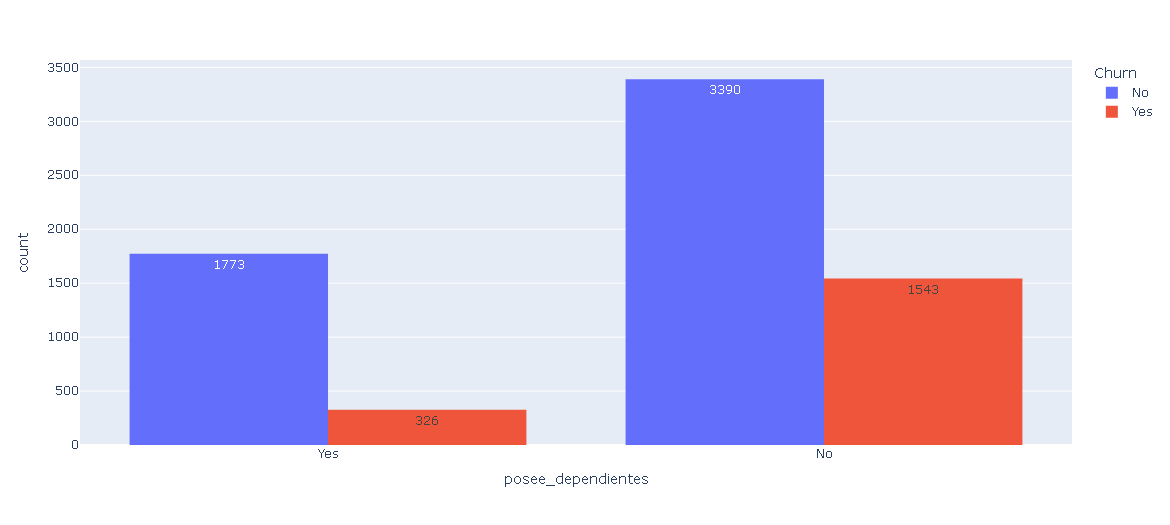

In [188]:
px.histogram(df, x = 'tipo_internet', text_auto = True, color = 'Churn', barmode = 'group')

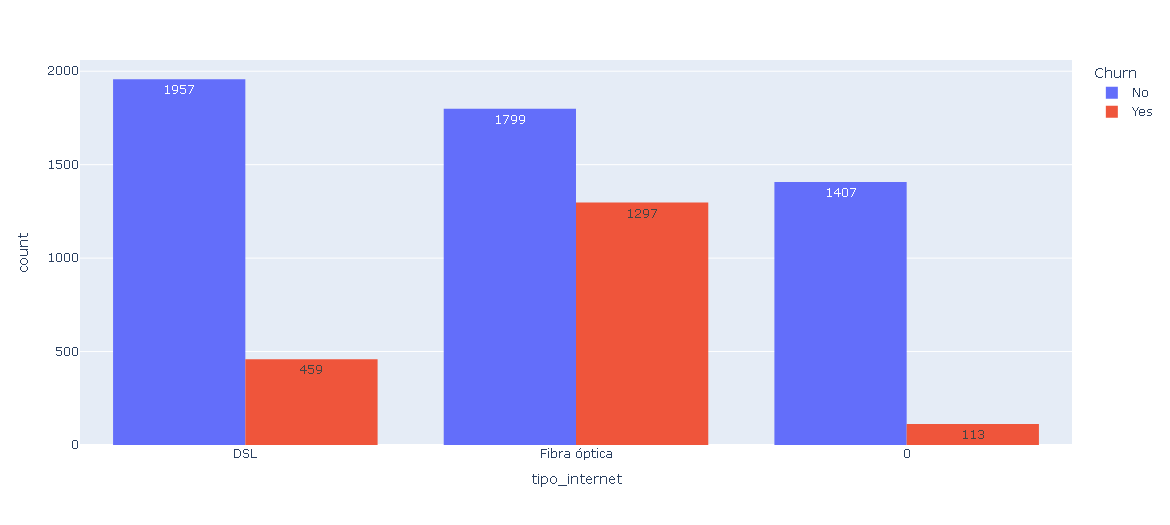

In [189]:
px.histogram(df, x = 'tipo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

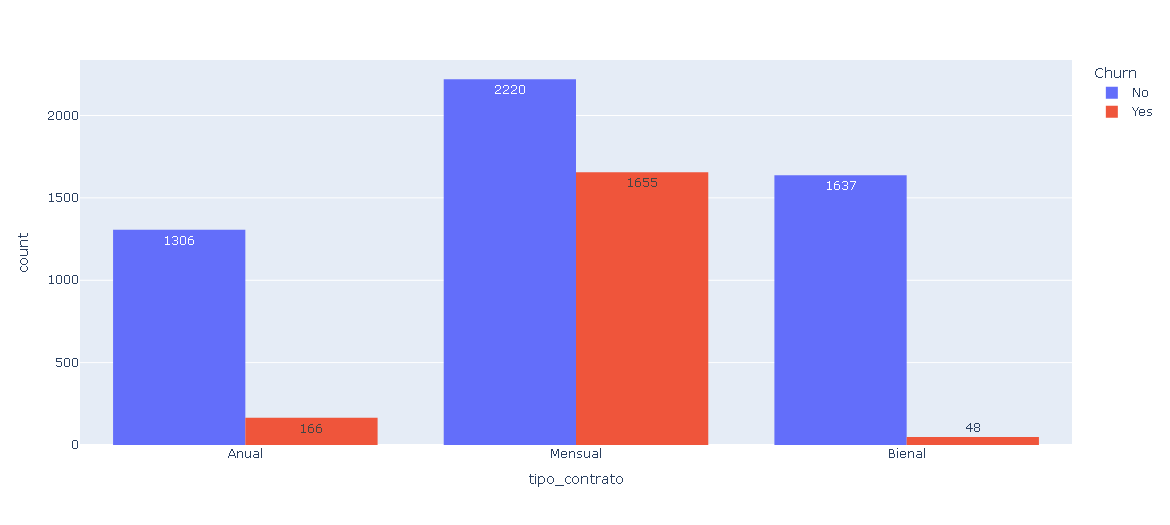

In [190]:
px.histogram(df, x = 'metodo_pago', text_auto = True, color = 'Churn', barmode = 'group')

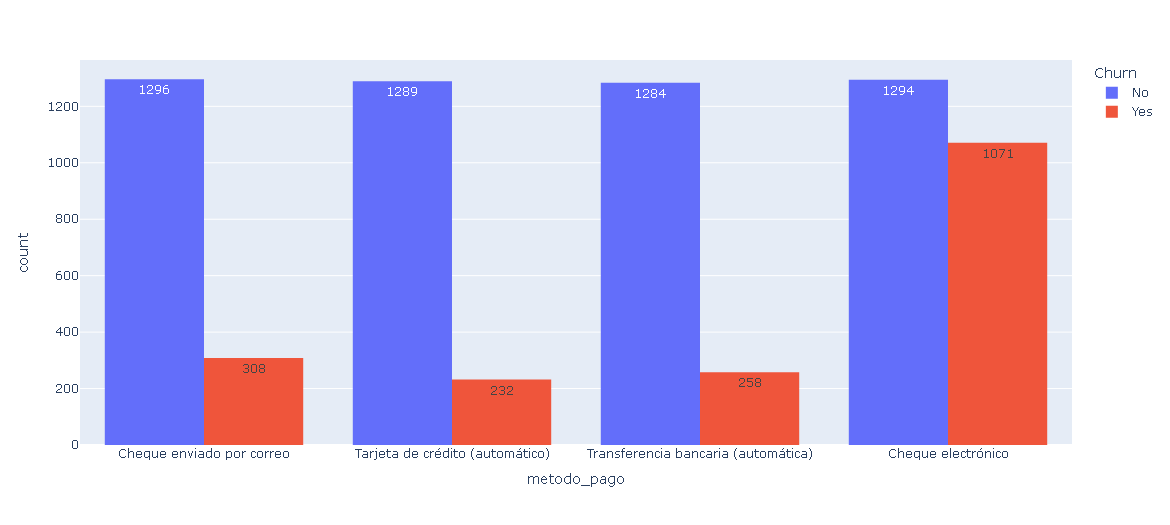

Observaciones

-Los generos masculino y feremino presentan relativamente casi los mismos registros de cancelaciones

-Los clientes que presentan mayor evasión son los menores de 60 años.

-Los clientes que no tienen pareja presentan más registros de cancelaciones en comparación de los clientes que si tienen pareja.

-Los clientes que no poseen dependientes presentan más registros de cancelaciones en comparación de los clientes que si poseen dependientes.

-Los clientes que tienen internet de fibra óptica presentan un alto registro de cancelaciones.

-Los clientes que tienen contratos mensuales presentan un alto registro de cancelaciones.

-El metodo de pago efectuado con cheque electrónico presenta un alto registro de cancelaciones.

Tasas de abandono por servicios

In [191]:
px.histogram(df, x = 'servicio_telefono', text_auto = True, color = 'Churn', barmode = 'group')

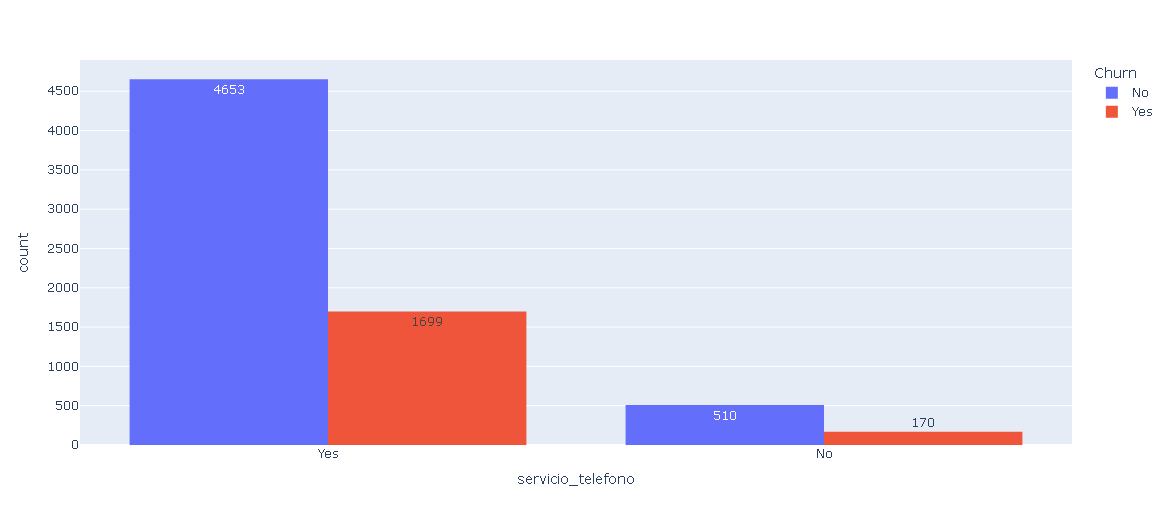

In [192]:
px.histogram(df, x = 'multiples_lineas', text_auto = True, color = 'Churn', barmode = 'group')

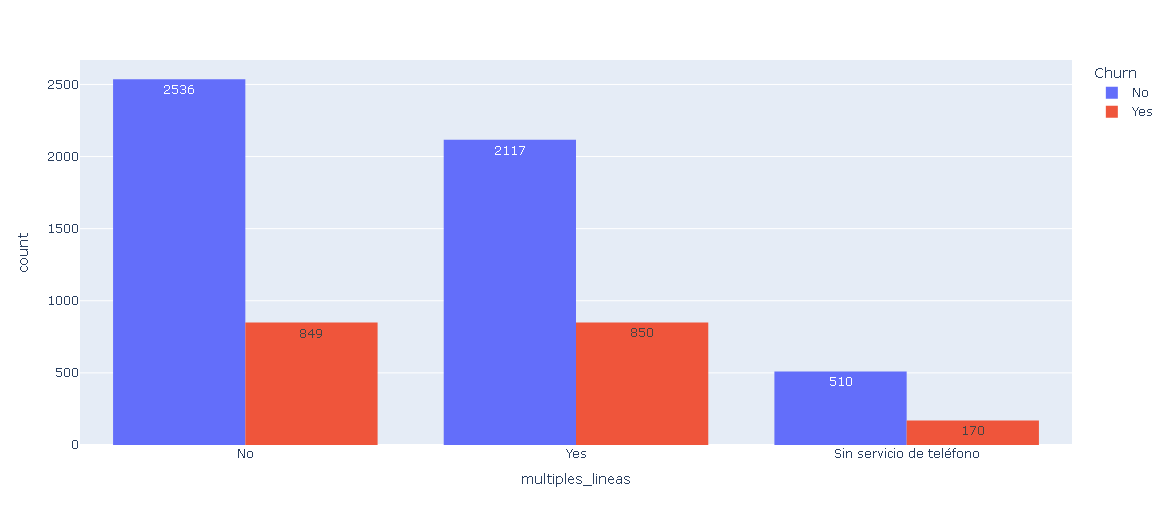

In [193]:
px.histogram(df, x = 'seguridad_online', text_auto = True, color = 'Churn', barmode = 'group')

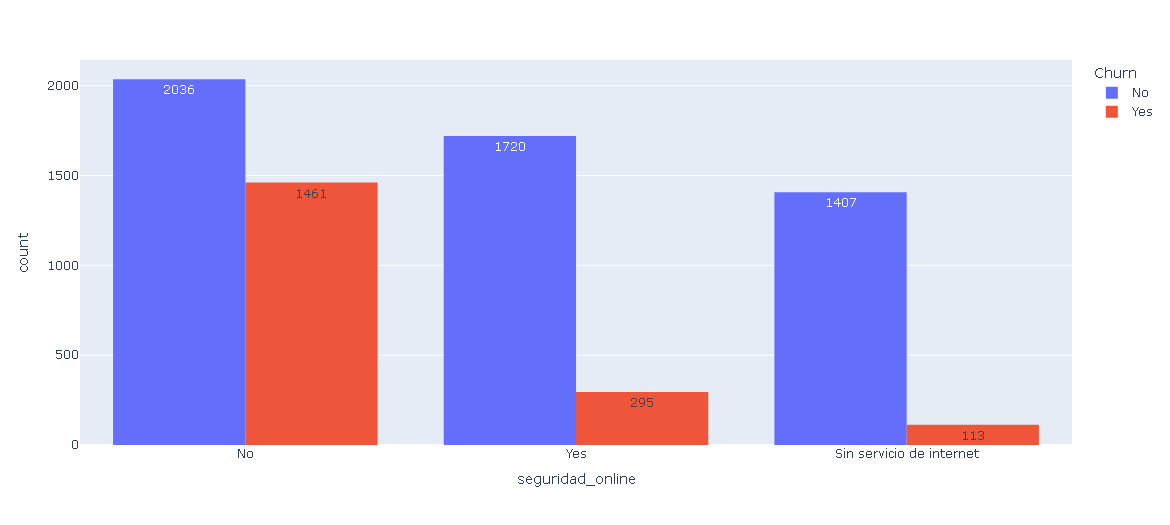

In [194]:
px.histogram(df, x = 'backup_online', text_auto = True, color = 'Churn', barmode = 'group')

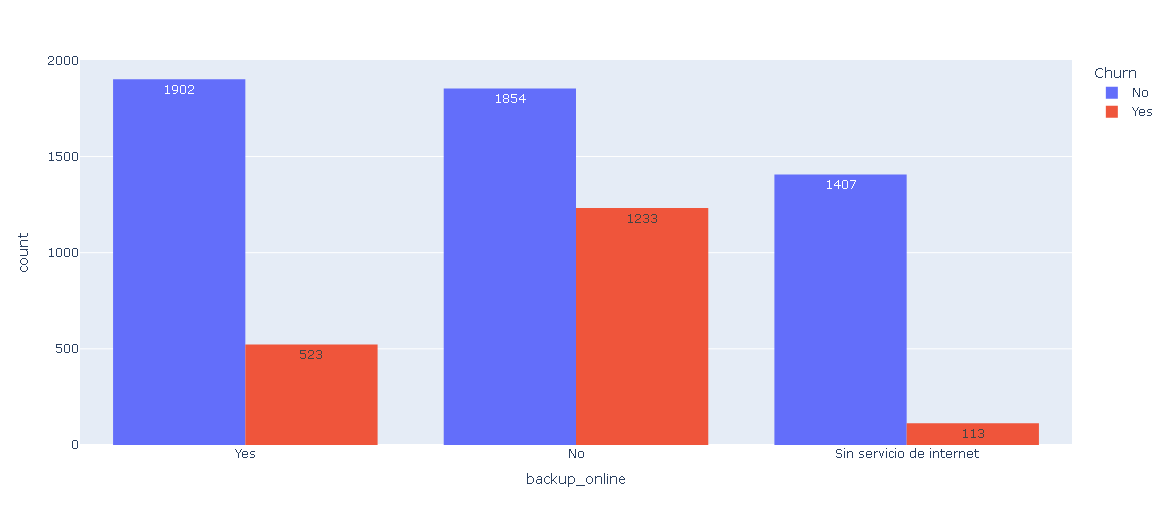

In [195]:
px.histogram(df, x = 'proteccion_dispositivo', text_auto = True, color = 'Churn', barmode = 'group')

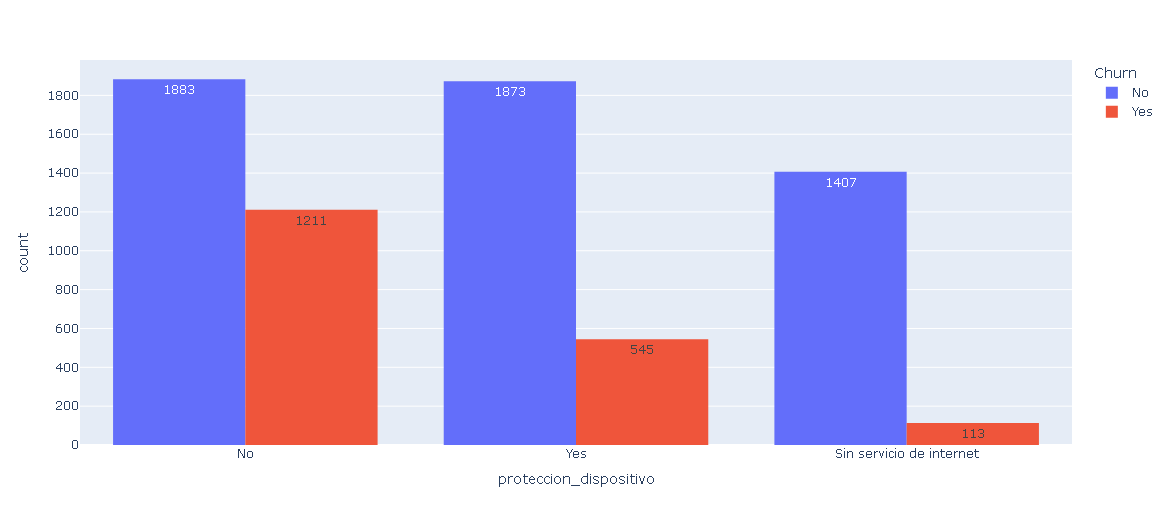

In [196]:
px.histogram(df, x = 'soporte_tecnico', text_auto = True, color = 'Churn', barmode = 'group')

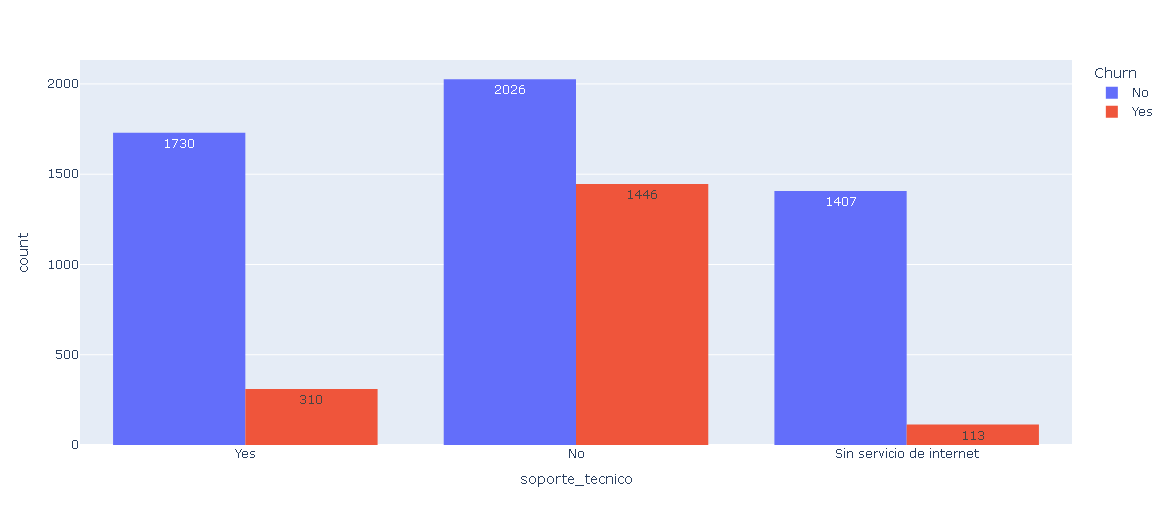

In [197]:
px.histogram(df, x = 'streaming_tv', text_auto = True, color = 'Churn', barmode = 'group')

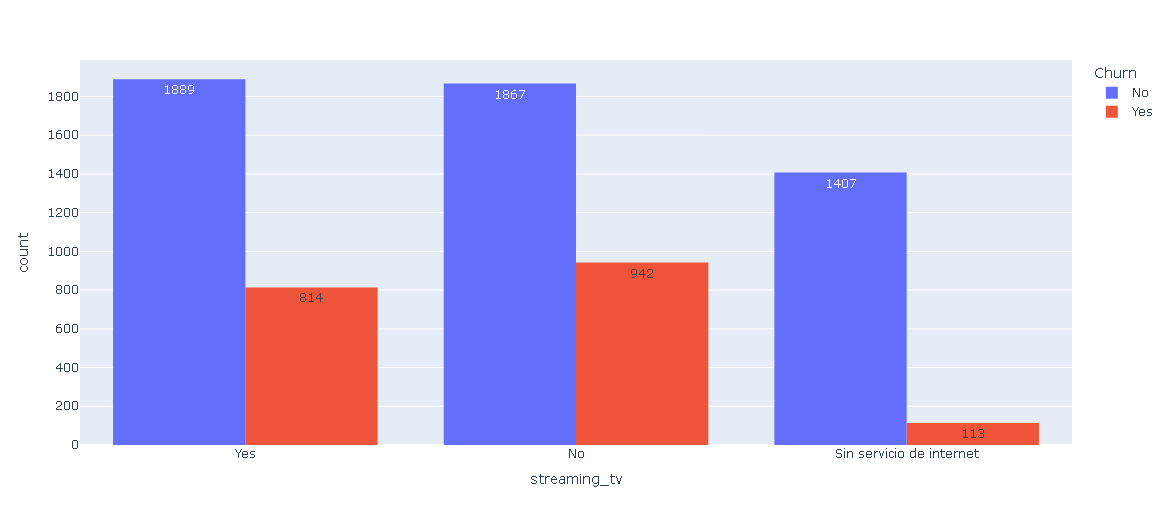

In [198]:
px.histogram(df, x = 'streaming_peliculas', text_auto = True, color = 'Churn', barmode = 'group')

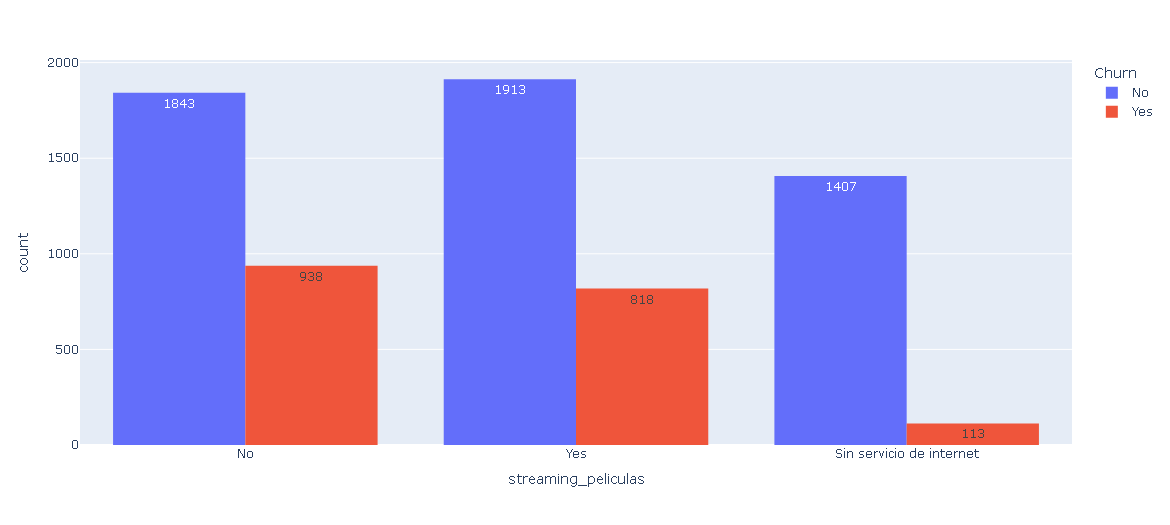

Observaciones

-Los clientes que si tienen servicio telefónico presentan un alto registro de cancelaciones.

-Los clientes que si tienen y no tienen múltiples líneas presentan relativamente casi los mismos registros de cancelaciones.

-Los clientes que no tienen el servicio de seguridad en línea presentan un alto registro de cancelaciones.

-Los clientes que no tienen el servicio de backup en linea presentan un alto registro de cancelaciones.

-Los clientes que no tienen el servicio de protección del dispositivo presentan un alto registro de cancelaciones.

-Los clientes que no tienen el servicio de soporte técnico presentan un alto registro de cancelaciones.

-Los clientes que si tienen y no tienen el servicio de streaming tv presentan relativamente casi los mismos registros de cancelaciones.

-Los clientes que si tienen y no tienen el servicio de streaming películas presentan relativamente casi los mismos registros de cancelaciones.

##Conteo de evasión por variables numéricas

Exploraremos cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [199]:
#Agrupar por tiempo_contrato y Churn
df_grouped = df.groupby(['tiempo_contrato', 'Churn']).size().unstack(fill_value=0)

#Calcular el % de churn por tiempo_contrato
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

#Mostrar el resultado
print(df_grouped[['churn_rate']])

Churn            churn_rate
tiempo_contrato            
1                 61.990212
2                 51.680672
3                 47.000000
4                 47.159091
5                 48.120301
...                     ...
68                 9.000000
69                 8.421053
70                 9.243697
71                 3.529412
72                 1.657459

[72 rows x 1 columns]


In [200]:
fig = px.line(df_grouped.reset_index(),
              x='tiempo_contrato',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por tiempo_contrato')
fig.show()

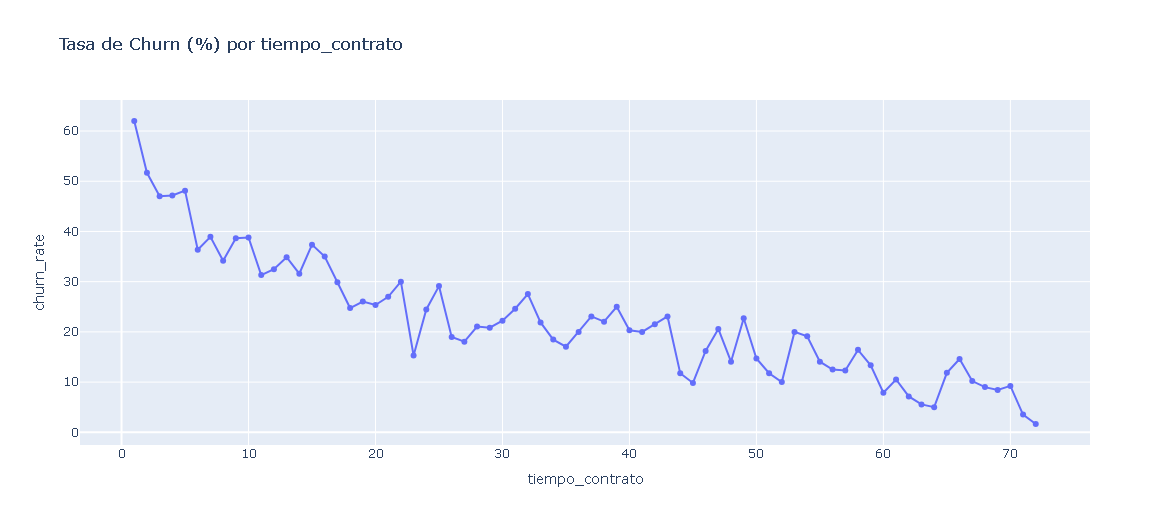

In [201]:
px.histogram(df, x = 'tiempo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

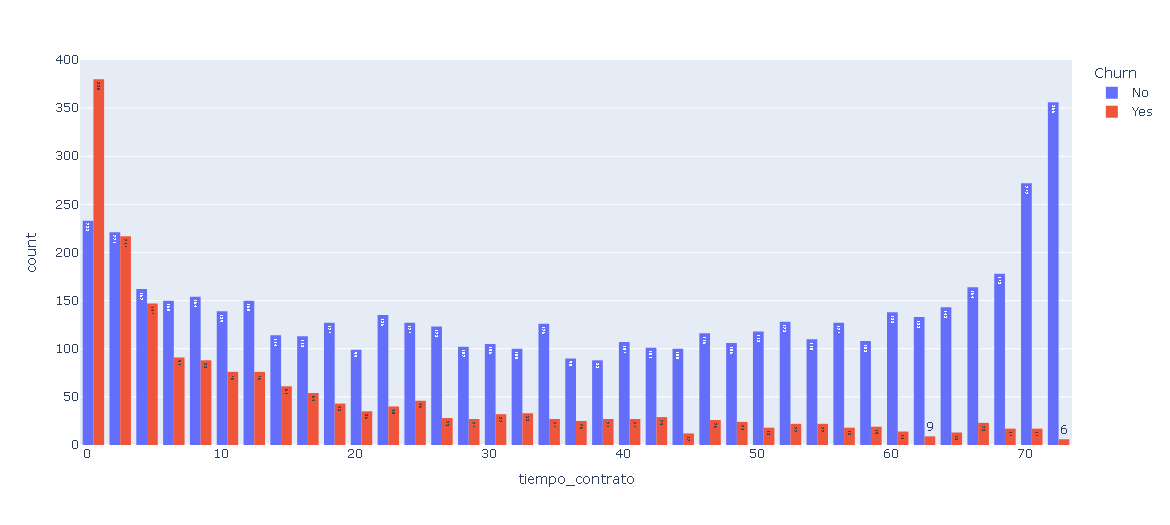

Observación

-Se registra una alta tasa de evasión de clientes en los primeros meses.

In [202]:
px.scatter(df,
           x="tiempo_contrato",
           y="valor_mensual",
           color="Churn",
           title="tiempo_contrato vs valor_mensual")

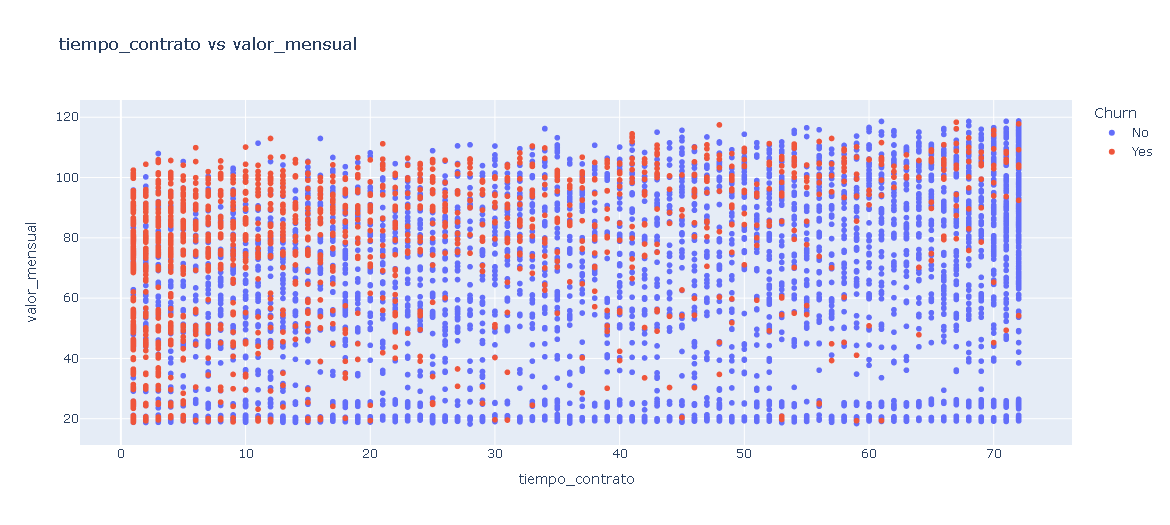

Observación

-Hay una concentración de cancelaciones que se debe al alto valor de la tarifa como lo vemos en la parte superior de la gráfica.

In [203]:
px.box(df, x = 'Churn', y = 'tiempo_contrato', color = 'Churn')

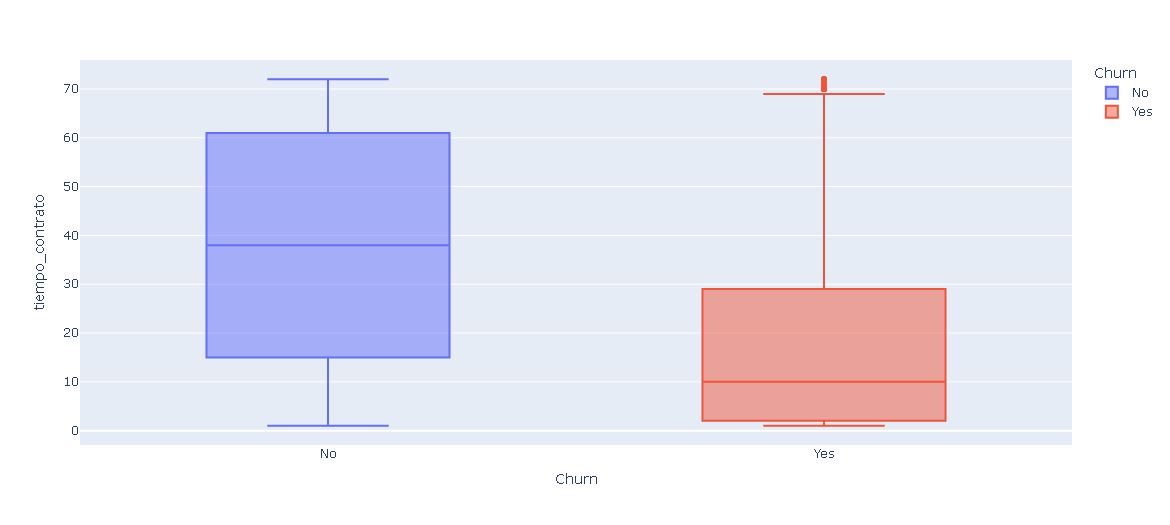

In [204]:
color = {
    'No': '#1f77b4',
    'Yes': 'red'
}

px.box(df, x = 'Churn', y = 'valor_mensual', color = 'Churn', color_discrete_map=color)

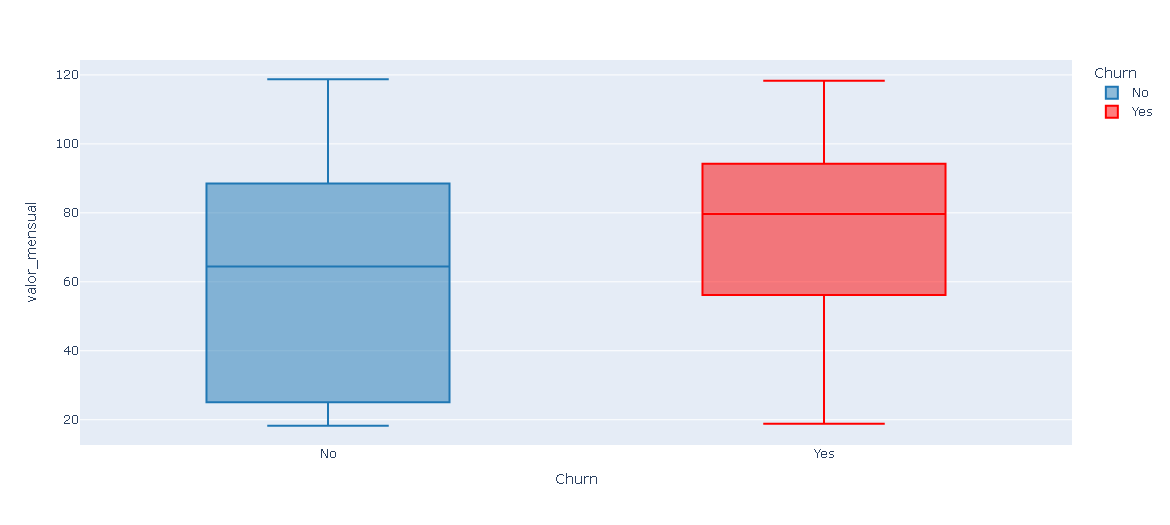

In [205]:
px.box(df, x = 'Churn', y = 'total_cobrado', color = 'Churn')

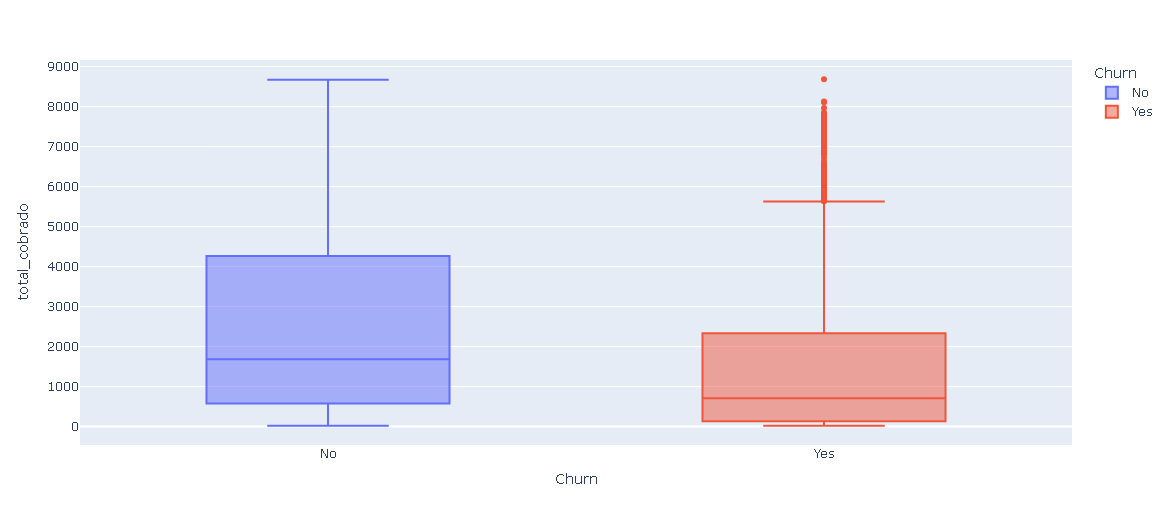

In [206]:
px.box(df, x = 'total_cobrado', color = 'Churn')

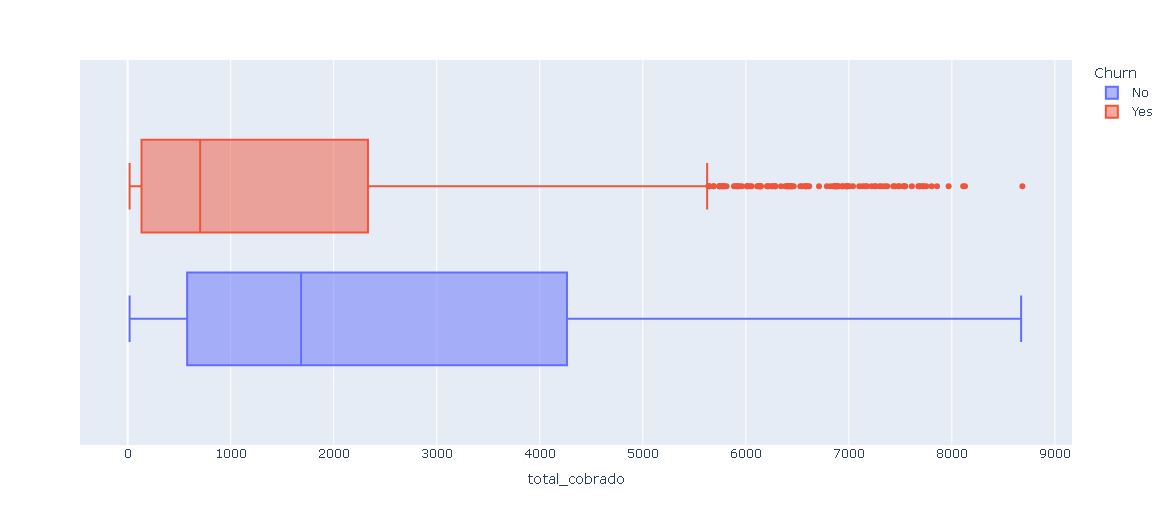

In [207]:
px.box(df, x = 'total_cobrado', y = 'Churn', color = 'Churn')

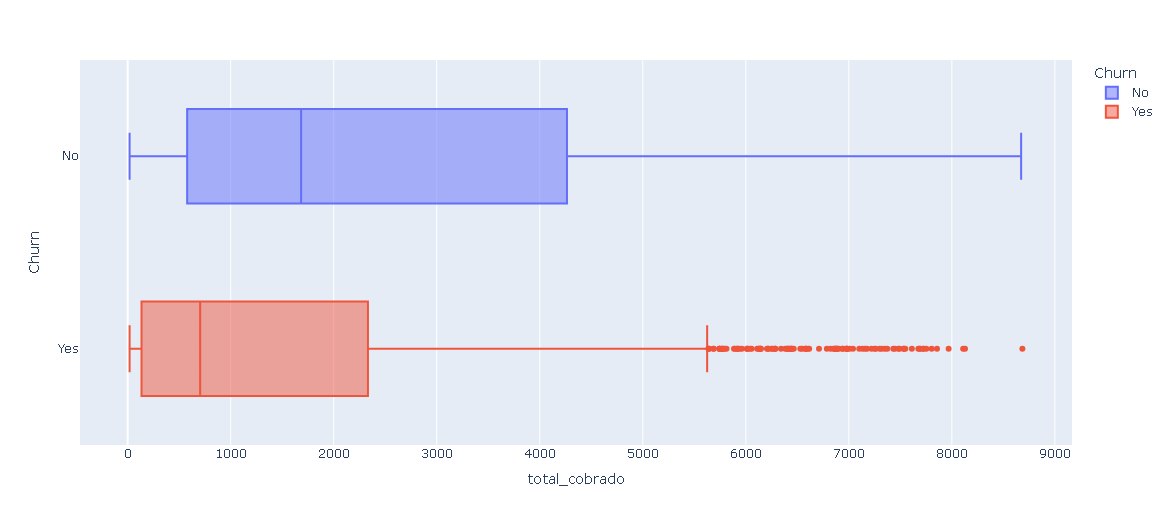

In [208]:
px.box(df, x = 'Churn', y = 'cuentas_diarias', color = 'Churn')

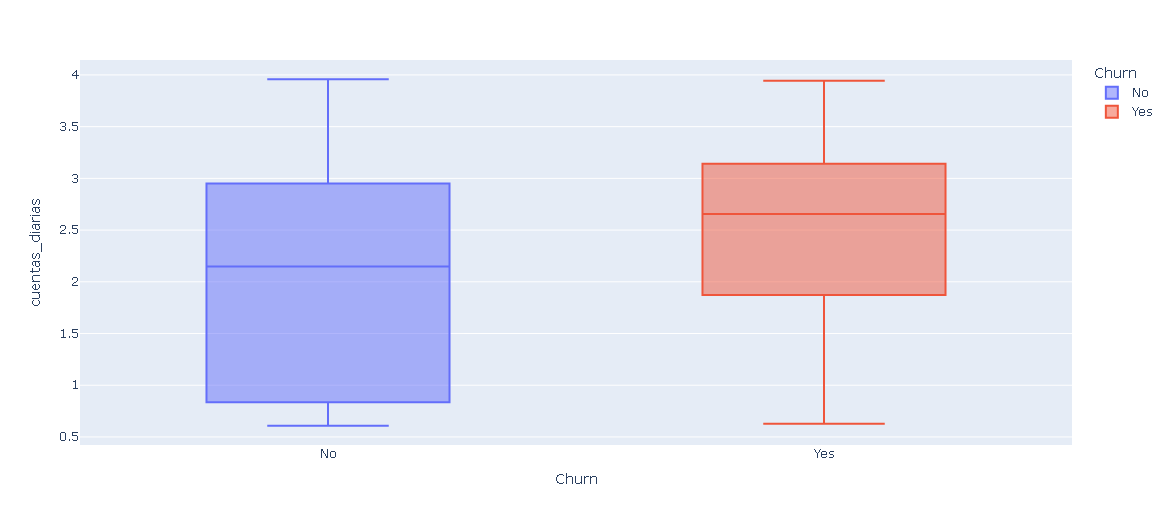

Observaciones

tiempo_contrato: los clientes que cancelan suelen tener un tiempo de contrato mucho más corto.

valor_mensual: los clientes con facturas mensuales más altas son más propensos a cancelar.

total_cobrado: los clientes no han acumulado mucha facturacipon historica antes de irse.

cuentas_diarias: los clientes con facturas mensuales más altas son más propensos a cancelar.

##Análisis de correlación entre variables

Exploraremos la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

-La relación entre la cuenta diaria y la evasión.

-Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Esto puede proporcionar insights valiosos para la creación de modelos predictivos más robustos.

In [209]:
#Transformamos a binarios

binarios = [
    'Churn',
    'posee_pareja',
    'posee_dependientes',
    'servicio_telefono',
    'multiples_lineas',
    'seguridad_online',
    'backup_online',
    'proteccion_dispositivo',
    'soporte_tecnico',
    'streaming_tv',
    'streaming_peliculas',
    'factura_digital'
]

for col in binarios:
    df[col] = df[col].map({
        'Yes': 1,
        'No': 0
        })
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,Anual,1,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Mensual,0,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0.0,Fibra óptica,...,1.0,0.0,0.0,0.0,Mensual,1,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0.0,Fibra óptica,...,1.0,0.0,1.0,1.0,Mensual,1,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0.0,Fibra óptica,...,0.0,1.0,1.0,0.0,Mensual,1,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Femenino,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,Anual,0,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,1.0,Fibra óptica,...,0.0,0.0,0.0,1.0,Mensual,1,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Mensual,1,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Bienal,0,Cheque enviado por correo,67.85,4627.65,2.261667


Efectuamos la correlación

In [210]:
df_numerico = df.select_dtypes(include=['int64', 'float64'])

#Calcular correlación
correlacion = df_numerico.corr()

#Mostrar resultado
correlacion

,Churn,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,factura_digital,valor_mensual,total_cobrado,cuentas_diarias
Churn,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040207,-0.280508,-0.195758,-0.176806,-0.274112,-0.036698,-0.040525,0.191454,0.192858,-0.199484,0.192858
tiene +60,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.153747,-0.110155,-0.003253,-0.011162,-0.135289,0.034150,0.050055,0.156258,0.219874,0.102411,0.219874
posee_pareja,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,0.150561,0.171581,0.173154,0.187386,0.144021,0.154387,0.146731,-0.013957,0.097825,0.319072,0.097825
posee_dependientes,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.026310,0.157478,0.096695,0.084184,0.136108,0.052660,0.025177,-0.110131,-0.112343,0.064653,-0.112343
tiempo_contrato,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.361306,0.377664,0.423038,0.423383,0.374344,0.328069,0.334866,0.004823,0.246862,0.825880,0.246862
servicio_telefono,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,NaN,-0.037132,0.014632,-0.005223,-0.040368,0.055687,0.042939,0.016696,0.248033,0.113008,0.248033
multiples_lineas,0.040207,0.153747,0.150561,-0.026310,0.361306,NaN,1.000000,0.053949,0.162362,0.170136,0.056993,0.216328,0.222925,0.174509,0.456642,0.466612,0.456642
seguridad_online,-0.280508,-0.110155,0.171581,0.157478,0.377664,-0.037132,0.053949,1.000000,0.179488,0.170099,0.273270,0.043613,0.056238,-0.139195,0.069771,0.331783,0.069771
backup_online,-0.195758,-0.003253,0.173154,0.096695,0.423038,0.014632,0.162362,0.179488,1.000000,0.185021,0.190381,0.146821,0.137064,0.006299,0.252683,0.431750,0.252683
proteccion_dispositivo,-0.176806,-0.011162,0.187386,0.084184,0.423383,-0.005223,0.170136,0.170099,0.185021,1.000000,0.235564,0.275900,0.289547,-0.022803,0.322484,0.446978,0.322484


#📄 Informe final

##Conclusiones

-La tasa de evasión general es del 26.6%, lo cual es un porcentaje bastante crítico.

-El abandono de clientes se concentra principalmente en los primeros meses de permanencia.

-Los contratos mensuales presentan tasas de abandono significativamente más altas, esto refuerza la impontancia de efectuar estrategias para garantizar sólo contratos a largo plazo, pero no sería conveniente debido a la competencia que hay en el mercado y el cliente tomaría la decisión de efectuar contratos con otra empresa con contratos mensuales y tal vez le garantice un mejor servicio. También hay que ver si el estado permite los contratos a largo plazo. Sería mejor que la empresa efectuara mejores estrategias en el contrato mensual, para que el cliente se sienta satisfecho.

-Los clientes que tienen un contrato a largo plazo, registran una menor tasa de abandono.

-La fibra óptica se identifica como un segmento de alto riesgo cuando no está acompañada de servicios de soporte.

-Los clientes que no usan los servicios de seguridad_online, backup_online y protección_dispositivo, presentan un alto registro de cancelaciones.

-Los medios de pago no automáticos están asociados a una mayor probabilidad de evasión.

-Debido al alto costo de la tarifa hay un alto registro de cancelaciones.

-Los servicios complementarios actúan como barreras en contra de las cancelaciones y mejoran la retención.

##Recomendaciones

-Ofrecer descuentos o beneficios atractivos para motivar a los clientes con contratos mensuales.

-La empresa debe brindar mejor atención con el soporte técnico.

-Se debe mejorar la percepción del servicio de fibra óptica a través de encuestas, mejoras técnicas o campañas de satisfacción.

-Incentivar más el uso de los servicios de seguridad_online, backup_online y protección_dispositivo.

-Promover más los métodos de pago automáticos.

-Orientar las estrategias hacia la buena calidad del servicio.

-Rebajar más la tarifa.